# Supervised Learning
&rarr; find correlations between variables; predicting/estimating output variables based on one or more input variables

- Given an input ($x$, samples of one or more variables) and an output response ($y$, samples of one or more other variables of the dataset), we have to find the relationship ($f$) between them: $y = f(x) + e$
    - where "$e$" is called **bias**, a random error that is independent of input and has mean zero
- The predicted/estimated function ($\hat{f}$) generates, with the same input ($x$), a resulting output ($\hat{y}$, the estimated samples): $\hat{y}=\hat{f}(x)$
- The accuracy lies on the similarity between $y$ and $\hat{y}$ (between the real samples and the predicted ones)

&rarr; **Regression**: predicting continuous (quantitative) value <br>
&rarr; **Classification**: predicting a discrete value, that corresponds to whether your sample belongs to a class or not

---
## Over/Underfitting

- The estimation of $f$ can be made by a parametric approach: it is generally much easier to estimate a set of parameters, than it is to fit an entirely arbitrary function.
    -  ***Overfitting***: the model we choose will usually not match the true unknown form of $f$. If the model is too flexible (too similar to $f$), the training error will be too low and the test error can be high. The solution is to change/remove parameters or simplify the model.
    - ***Underfitting*** happens when you underestimate the model.
- It is important to decide for any given set of data which method produces the best results
    - **Linear** models are simple but often too inaccurate
    - **Highly non-linear** models can potentially provide more accurate predictions, but far more complex

---
## Bias–Variance tradeoff
- The ***bias*** error is an error from erroneous assumptions in the learning algorithm. High bias can cause an algorithm to miss the relevant relations between features and target outputs (underfitting).
- The ***variance*** is an error from sensitivity to small fluctuations in the training set. High variance may result from an algorithm modeling the random noise in the training data (overfitting).


---
## Classification Metrics [(doc)](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics)
(for binary predictions)
|  |  | |
| --- | --- | --- |
| **Accuracy** | Mean between the error rate of all the predictions; error rate is 1 if wrong prediction, 0 otherwise <br> Can be heavily misleading when classes are highly imbalanced | $$ (TP + TN) / N $$ |
| **Precision** | The ratio between correctly predicted positive observations and the total predicted positive observations. <br>High precision relates to the low false positive rate and it helps when the costs of false positives are high | $$  TP/(TP + FP) $$ |
| **Recall/Sensitivity** | The ratio between correctly predicted positive observations and all observations in the actual class. <br>High recall means a low false-negative rate and it helps when the cost of false negatives is high | $$ TP/(TP+FN) $$ |
| **Specificity** | The ratio between correctly predicted negative observations and all observations in the actual class | $$TN/(TN+FP)$$ |
| **F1 score** |  The weighted average of Precision and Recall. <br> Is always interesting, because has higher values when precision and recall are reasonably balanced. <br>A good score means that there are low false positives and low false negatives, so the model is correctly identifying real threats and it is not disturbed by false alarms. <br> If the costs of errors on positives and negatives are significantly different, then it is necessary to evaluate precision and recall | $$2\frac{Precision*Recall}{Precision+Recall}$$ |

- For Multi-Class predictions:
    - Precision, Recall and F1–score are intrinsically defined for a single class
    - when a single value is necessary to optimize the hyperparameters, as in GridSearch, if we need to maximize one of Precision, Recall, F1–score, an *average value* is required:
        - *macro average*: the measure of each class has the same impact on the average value, therefore in case of imbalance the minority classes have an influence bigger than their frequency (of appearance)
        - *weighted average*: the measure of each class influences the result in proportion to its frequency

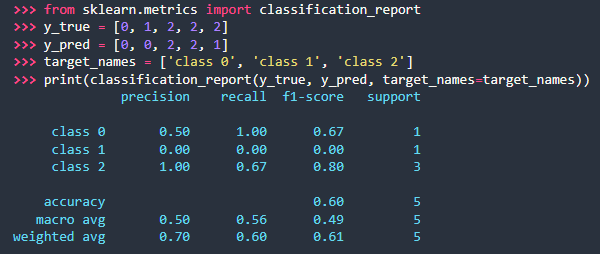

## Regression Metrics [(doc)](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics)

|  |  |
| --- | --- |
| **Residual Sum of Squares (RSS)** | the sum of the squares of all residuals, which are the distance between the predicted value and the real one. A problem is the value that increases with the number of samples. $$ RSS = \sum_{i=1}^{n} (y_i - \hat{y_i})^2 $$ |
| **Mean Squared Error (MSE)** | the mean of all the distances (squared) between a predicted sample and the real one $$ MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2 $$ |
| **Mean Absolute Error (MAE)** | $$ MAE = \frac{1}{n} \sum_{i=1}^{n} \|y_i - \hat{y_i}\| $$ |
| **Residual Standard Error (RSE)** | absolute measure of lack of fit of the model. RSS normalized with respect to n and p: $$ RSE = \sqrt{\frac{1}{n - p - 2} \times RSS} $$ |
| **Explained Sum of Squares (ESS)** | quantity of variance explained by the model. How much the predicted data differ from the mean: $$ ESS = \sum_{i=1}^n (\hat{y_i} - \overline{y})^2 $$ |
| **Total Sum of Squares (TSS)** | Total variance in the response data. How much the real data differ from the mean: $$ TSS = ESS + RSS = \sum_{i=1}^n (y_i - \overline{y})^2 $$ |
| **R^2** |     $$ R^2 = \frac{ESS}{TSS} = 1 - \frac{RSS}{TSS} $$ - close to 1: the model fits well the data <br> - close to 0: linear model is wrong, or bias error is high<br> - It is not meaningful for non–linear or non–algebraic regression models <br> It measures how closely the variance of the model's predicted data aligns with the variance of the actual data |

---

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

random_state = 42

wine = datasets.load_wine()
df_X = wine["data"]
df_y = wine["target"]
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=random_state)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=random_state)

## Train/Validation/Test split

- The Training Set is the set of samples used for training our model
- The Validation Set is the set of samples we used to tune the hyperparameters of our model. ***Calibrating the hyperparameters on the test set means overestimating the performance***
- The Test Set is the set of samples on which to evaluate the final performance of the system

In [2]:
#########################################################################
#########################################################################
# CLASSIC SPLIT
#########################################################################

# Split X and y into train and test, with test size of 33% of the total
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.33, random_state=random_state)
# Split X_train and y_train into train and valuation, with valuation size of 25% of the train total
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=random_state)


#########################################################################
#########################################################################
# PERSONALIZED train_validation_test_split()
#########################################################################


def train_validation_test_split(*arrays, train_size=None, validation_size=None, test_size=None, random_state=None):
    """
    Splits a dataset into train, validation, and test sets based on the provided proportions.

    # Parameters:
        *arrays : sequence of indexables with same length / shape[0]
            Allowed inputs are lists, numpy arrays, scipy-sparse
            matrices or pandas dataframes.
        train_size (float):
            Proportion of the dataset for the training set (0.0 to 1.0).
        validation_size (float):
            Proportion of the dataset for the validation set (0.0 to 1.0).
        test_size (float):
            Proportion of the dataset for the test set (0.0 to 1.0).

    # Returns:
        X_train, X_val, X_test, y_train, y_val, y_test: Split datasets.
    """
    if train_size and validation_size:
        test_size = 1.0 - train_size - validation_size
    elif test_size and validation_size:
        train_size = 1.0 - test_size - validation_size
    else:
        raise ValueError("Provide either train and validation sizes or test and validation sizes.")

    if test_size < 0 or validation_size < 0 or train_size < 0:
        raise ValueError("The total sum must be a value < 1.0")

    X_train, X_test, y_train, y_test = train_test_split(*arrays, test_size=test_size, random_state=random_state)
    X_train, X_val, y_train, y_val = train_test_split(
        X_train,
        y_train,
        test_size=validation_size * (X_train.shape[0] + X_test.shape[0]) / X_train.shape[0],
        random_state=random_state,
    )

    return X_train, X_val, X_test, y_train, y_val, y_test


X_train, X_val, X_test, y_train, y_val, y_test = train_validation_test_split(
    df_X, df_y, test_size=0.33, validation_size=0.1675
)

print("X:\t", df_X.shape)
print("X_train:", X_train.shape, ", %", X_train.shape[0] * 100 / df_X.shape[0])
print("X_val:\t", X_val.shape, ", %", X_val.shape[0] * 100 / df_X.shape[0])
print("X_test:\t", X_test.shape, ", %", X_test.shape[0] * 100 / df_X.shape[0])
print("y:\t", df_y.shape)
print("y_train:", y_train.shape)
print("y_val:\t", y_val.shape)
print("y_test:\t", y_test.shape)

X:	 (178, 13)
X_train: (89, 13) , % 50.0
X_val:	 (30, 13) , % 16.853932584269664
X_test:	 (59, 13) , % 33.146067415730336
y:	 (178,)
y_train: (89,)
y_val:	 (30,)
y_test:	 (59,)


---
---
# Cross Validation with *Train-Validation-Test Split*
- Train and Validation sets do not change during the search for optimal hyperparameters

In [3]:
random_state = 42
dataset = datasets.load_wine()
X_train, X_test, y_train, y_test = train_test_split(
    dataset["data"], dataset["target"], test_size=0.4, random_state=random_state
)

# Parameters to keep the best results
clf = dict()
best_acc = 0
best_acc_ind = -1


for i in range(1, 22, 5):
    clf[i] = KNeighborsClassifier(n_neighbors=i)

    # Fit on TRAIN SET
    clf[i].fit(X_train, y_train)

    # Score on VALIDATION SET
    acc = clf[i].score(X_val, y_val)

    if best_acc < acc:
        best_acc = acc
        best_acc_ind = i

    print("Accuracy on VALIDATION SET: {:.5f}".format(acc), "K =", i)

print("\nBest validation model: K =", best_acc_ind)

# Test on TEST SET
acc = clf[best_acc_ind].score(X_test, y_test)
print("Accuracy on TEST SET: {:.5f}".format(acc))

Accuracy on VALIDATION SET: 0.96667 K = 1
Accuracy on VALIDATION SET: 0.70000 K = 6
Accuracy on VALIDATION SET: 0.76667 K = 11
Accuracy on VALIDATION SET: 0.76667 K = 16
Accuracy on VALIDATION SET: 0.76667 K = 21

Best validation model: K = 1
Accuracy on TEST SET: 0.75000


---
# Cross Validation with *k-Fold* and *cross_val_score()*
- Train and Validation sets do change during the search for optimal hyperparameters
- **Leave-One-Out** Cross-Validation. Leave out one sample, fit the model on the remaining samples, and finally validate(/test) the model on the left-out sample. Then repeat for every sample, and calculate the final error as the mean of all errors. It's very very expensive because there are as many iterations as number of samples.
- ***k-Fold*** Cross Validation. Randomly divide the set of samples into "k" groups (folds) of approximately equal size. The first fold is left out, the remaining are fitted, and finally the model is tested on the fold left out. Then repeat for every fold, and calculate the final error as the mean of all errors. Typically 3 to 5 folds.

### With Preprocessing and *Data Leakage*:

In [4]:
import numpy as np
from sklearn import datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.svm import SVC

random_state = 42
dataset = datasets.load_wine()
X_train, X_test, y_train, y_test = train_test_split(
    dataset["data"], dataset["target"], test_size=0.4, random_state=random_state
)

# PREPROCESSING
# WARNING!!!: preprocessing the data with Min-Max or StandardScaling (in general with all normalizations that follow the vertical axes) and then performing a cross_val_score() introduces *DATA LEAKAGE*. This is because cross_val_score() splits the train set in "cv" folds at each iteration, and uses only "cv-1" for training. The left-out is used for validation, that is to calculate the error. But this left-out fold is already preprocessed with the scaler taken from all the "cv" folds, and not only on the "cv-1" train folds. Therefore this left-out validation fold is preprocessed even with his own data, *and this means overstimate the performance*.
scaler = preprocessing.MinMaxScaler()
scaler.fit(X_train)
X_train_p = scaler.transform(X_train)
X_test_p = scaler.transform(X_test)

# Parameters to keep the best results
best_acc = 0
bestK = "linear"

# KFold
cv = KFold(n_splits=5, shuffle=True, random_state=random_state)

# Iterate on an hyperparameter
for kernel in ["linear", "poly", "rbf"]:
    clf = SVC(kernel=kernel, random_state=random_state)
    # Cross Validate
    scores = cross_val_score(clf, X_train_p, y_train, cv=cv, n_jobs=-1)

    # save best result so far
    acc = np.mean(scores)
    print(
        "Cross validation score: {:.3f}".format(acc),
        "kernel =",
        kernel,
    )
    if best_acc < acc:
        best_acc = acc
        bestK = kernel


print("Best Kernel:", bestK)
clf = SVC(kernel=bestK, random_state=random_state)
clf.fit(X_train_p, y_train)
print("Test set accuracy: {:.5f}".format(clf.score(X_test_p, y_test)))

Cross validation score: 0.962 kernel = linear
Cross validation score: 0.934 kernel = poly
Cross validation score: 0.962 kernel = rbf
Best Kernel: linear
Test set accuracy: 0.98611


---
# Cross Validation with GridSearch
- Find the best hyperparameters, trying every combination of them
- Useful doc for advanced operations on Pipeline: [doc](https://amueller.github.io/aml/01-ml-workflow/12-pipelines-gridsearch.html)

### With Preprocessing and *no Data Leakage*:

In [5]:
from sklearn import datasets, preprocessing
from sklearn.metrics import make_scorer, mean_squared_error, precision_score
from sklearn.model_selection import ParameterGrid, train_test_split, GridSearchCV
from matplotlib import pyplot as plt
from sklearn import svm
from sklearn.pipeline import Pipeline


plt.style.use("seaborn-v0_8")
random_state = 42

dataset = datasets.load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    dataset["data"], dataset["target"], test_size=0.3, random_state=random_state
)

# Grid of hyperparameters
param_grid = {
    "scaler": [
        "passthrough",
        preprocessing.StandardScaler(),
        preprocessing.MinMaxScaler(),
        preprocessing.Normalizer(norm="l1"),
        preprocessing.Normalizer(norm="l2"),
        preprocessing.Normalizer(norm="max"),
    ],
    "svc__kernel": ["linear", "poly", "rbf"],
    "svc__C": [0.01, 0.1, 1, 10, 100, 500],
}

# ParamGrid Length
print("ParamGrid length: {}\n".format(len(list(ParameterGrid(param_grid)))))

# Iterate over different scores
scorings = [
    "accuracy",
    make_scorer(precision_score, zero_division=0),
    "recall_macro",
    "f1_macro",
    make_scorer(mean_squared_error, greater_is_better=False, squared=False),
]
for score in scorings:
    pipe = Pipeline([("scaler", None), ("svc", svm.SVC(random_state=random_state))])
    gs = GridSearchCV(
        pipe,
        param_grid=param_grid,
        scoring=score,
        n_jobs=-1,
        cv=5,
    )

    gs.fit(X_train, y_train)

    print(
        'Params: {}\nScore "{}": {}\n'.format(
            gs.best_params_,
            score,
            gs.score(X_test, y_test),
        )
    )

ParamGrid length: 108

Params: {'scaler': MinMaxScaler(), 'svc__C': 100, 'svc__kernel': 'linear'}
Score "accuracy": 0.9766081871345029

Params: {'scaler': StandardScaler(), 'svc__C': 10, 'svc__kernel': 'linear'}
Score "make_scorer(precision_score, zero_division=0)": 0.9811320754716981

Params: {'scaler': MinMaxScaler(), 'svc__C': 100, 'svc__kernel': 'linear'}
Score "recall_macro": 0.9748677248677249

Params: {'scaler': MinMaxScaler(), 'svc__C': 100, 'svc__kernel': 'linear'}
Score "f1_macro": 0.9748677248677249

Params: {'scaler': MinMaxScaler(), 'svc__C': 100, 'svc__kernel': 'linear'}
Score "make_scorer(mean_squared_error, greater_is_better=False, squared=False)": -0.1529438225803745



---
### Iterate over multiple estimators

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

dataset = datasets.load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    dataset["data"], dataset["target"], test_size=0.3, random_state=random_state
)

param_grid = [
    {
        "est": [RandomForestClassifier(n_jobs=-1)],
        "est__criterion": ["gini", "entropy", "log_loss"],
        "est__max_depth": [10, 30, 40, 50],
    },
    {
        "est": [KNeighborsClassifier(n_jobs=-1)],
        "est__weights": ["uniform", "distance"],
        "est__n_neighbors": [*range(1, X_test.shape[0] // 2)],
    },
]

pipe = Pipeline([("est", None)])

grid = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring="f1_macro", cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

print(
    "Params: {}\nScore: {}\n".format(
        grid.best_params_,
        grid.score(X_test, y_test),
    )
)

Params: {'est': RandomForestClassifier(n_jobs=-1), 'est__criterion': 'log_loss', 'est__max_depth': 40}
Score: 0.962044983722995

